# Titanic Survival Prediction: EDA and Data Modeling

## What is EDA?

**Exploratory Data Analysis (EDA)** is the process of examining datasets to summarize their main characteristics, often using visual methods. It helps to:
- Understand the structure of the data.
- Detect missing values or outliers.
- Identify patterns and relationships between variables.
- Formulate hypotheses based on visual insights.

### Advantages of EDA:
- **Improves understanding** of data structure and quality.
- **Supports feature selection** and engineering by highlighting important variables.
- **Guides data cleaning** by identifying missing or inconsistent data.
- **Informs model choice** and evaluation strategies.

---

## What is Data Modeling?

**Data modeling** involves applying mathematical and statistical techniques to data to build predictive or descriptive models. In this context, we are using a **supervised learning** technique where:
- The **features (X)** are used to predict the **target (y)**.
- The target variable is whether the passenger survived (binary classification: 0 or 1).

---

## What is Logistic Regression?

**Logistic Regression** is a classification algorithm used to predict binary outcomes. Unlike linear regression, which predicts continuous values, logistic regression estimates the **probability** that a given input belongs to a particular category.

### Formula:
The logistic regression model uses the **sigmoid function**:

\[
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
\]

Where:
- \( P \) is the probability of survival.
- \( X_i \) are feature variables.
- \( \beta_i \) are coefficients learned from the data.

### Why Logistic Regression?
- Simple and interpretable.
- Performs well on linearly separable data.
- Useful baseline model for binary classification tasks.

---

## Steps Followed in the Titanic Project:

### 1. Import Libraries
We imported essential libraries for data analysis, visualization, and modeling.

### 2. Load Dataset
Used the dataset available at: https://raw.githubusercontent.com/suyashi29/python-su/refs/heads/master/Data%20Visualization%20using%20Python/titanic.csv 



### 3. Initial Inspection
- Checked data shape and summary.
- Looked at data types and statistical properties.

### 4. Drop Unnecessary Columns
Removed columns that do not contribute to prediction (`PassengerId`, `Name`, `Ticket`, `Cabin`).

### 5. Handle Missing Values
- Filled missing values in `Age` with the median.
- Filled missing values in `Embarked` with the mode.

### 6. Feature Engineering
- Created a new column `FamilySize` = `SibSp` + `Parch` + 1.
- Converted categorical features (`Sex`, `Embarked`) to numeric using `LabelEncoder`.

### 7. Visualization (EDA)
- Used `seaborn` and `matplotlib` to explore:
  - Survival distribution.
  - Age distribution.
  - Correlation heatmap.
  - Survival by gender.

### 8. Data Preparation
- Separated features and target.
- Scaled features using `StandardScaler`.
- Performed train-test split (80/20).

### 9. Modeling
- Used `LogisticRegression` to fit the model on training data.

### 10. Evaluation
- Evaluated the model using accuracy, confusion matrix, and classification report.




In [1]:
# 1.Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Set custom color palette
custom_palette = ["orange", "yellow", "pink", "green"]
sns.set_palette(custom_palette)

In [3]:
#  Load the data
data_url = "https://raw.githubusercontent.com/suyashi29/python-su/refs/heads/master/Data%20Visualization%20using%20Python/titanic.csv"
df = pd.read_csv(data_url)

In [4]:
## Displaying data 
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass,Ticket
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,3,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,PC 17599
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,3,STON/O2. 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,113803
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,3,373450


In [5]:
# Initial inspection
 
print("Initial Data Shape:", df.shape)

Initial Data Shape: (891, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Pclass       891 non-null    int64  
 11  Ticket       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
## Statistical describtion
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,2.308642
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,0.836071
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [8]:
df.describe(include="object")

,Name,Sex,Cabin,Embarked,Ticket
count,891,891,204,889,891
unique,891,2,147,3,681
top,"Braund, Mr. Owen Harris",male,B96 B98,S,347082
freq,1,577,4,644,7


In [9]:
# 4. Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass
0,0,male,22.0,1,0,7.2500,S,3
1,1,female,38.0,1,0,71.2833,C,1
2,1,female,26.0,0,0,7.9250,S,3
3,1,female,35.0,1,0,53.1000,S,1
4,0,male,35.0,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,2
887,1,female,19.0,0,0,30.0000,S,1
888,0,female,NaN,1,2,23.4500,S,3
889,1,male,26.0,0,0,30.0000,C,1


In [11]:
# Handle missing values
print("Missing values before:")
print(df.isnull().sum())

Missing values before:
Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Pclass        0
dtype: int64


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("Missing values after:")
df.isnull().sum()

Missing values after:


Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Pclass      0
dtype: int64

In [13]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass
0,0,male,22.0,1,0,7.2500,S,3
1,1,female,38.0,1,0,71.2833,C,1
2,1,female,26.0,0,0,7.9250,S,3
3,1,female,35.0,1,0,53.1000,S,1
4,0,male,35.0,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,2
887,1,female,19.0,0,0,30.0000,S,1
888,0,female,28.0,1,2,23.4500,S,3
889,1,male,26.0,0,0,30.0000,C,1


## Feature Engineering

In [14]:
# Creating new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [21]:
# Creating Age Groups
def age_group(age):
    if age < 1:
        return 'Infant'
    elif age < 12:
        return 'Child'
    elif age < 24:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

In [22]:
df['AgeGroup'].describe()

count       891
unique        5
top       Adult
freq        618
Name: AgeGroup, dtype: object

In [23]:
# Encode 'Sex', 'Embarked', 'AgeGroup'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

In [24]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,FamilySize,AgeGroup
0,0,1,22.0,1,0,7.2500,2,3,2,4
1,1,0,38.0,1,0,71.2833,0,1,2,0
2,1,0,26.0,0,0,7.9250,2,3,1,0
3,1,0,35.0,1,0,53.1000,2,1,2,0
4,0,1,35.0,0,0,8.0500,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,2,2,1,0
887,1,0,19.0,0,0,30.0000,2,1,1,4
888,0,0,28.0,1,2,23.4500,2,3,4,0
889,1,1,26.0,0,0,30.0000,0,1,1,0


### Visualizations

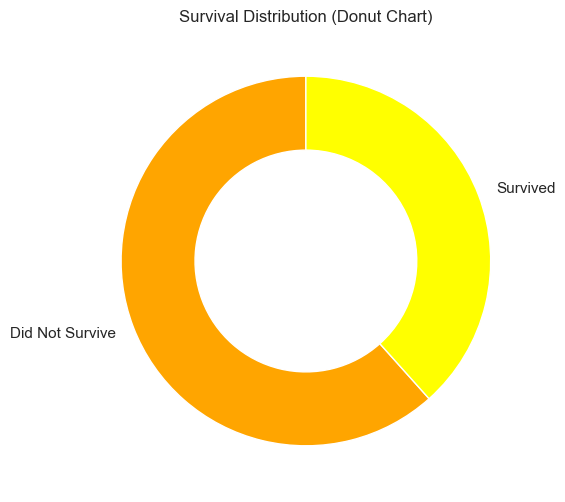

In [25]:
sns.set(style="darkgrid")

# Donut Chart - Survival Distribution
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Did Not Survive', 'Survived'], colors=custom_palette[:2], startangle=90, wedgeprops={'width':0.4})
plt.title('Survival Distribution (Donut Chart)')
plt.show()


## There were more passengers who lost their lives the incident

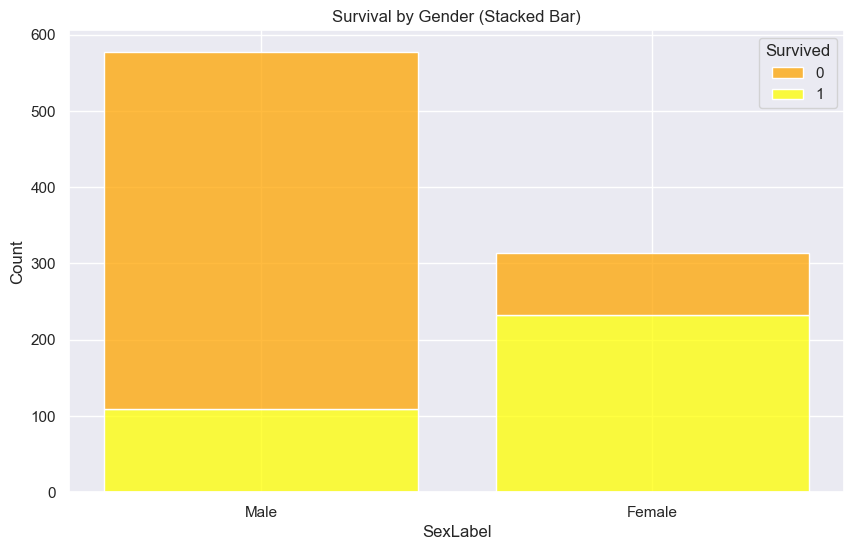

In [27]:
# Stacked Bar - Survival by Sex and AgeGroup
plt.figure(figsize=(10, 6))
df_temp = df.copy()
df_temp['SexLabel'] = df_temp['Sex'].replace({0: 'Female', 1: 'Male'})
sns.histplot(data=df_temp, x='SexLabel', hue='Survived', multiple='stack', palette=custom_palette[:2], shrink=0.8)
plt.title('Survival by Gender (Stacked Bar)')
plt.show()

### More Number of Males travelling but most of the females survived. (if you are female you have more chances of survival)


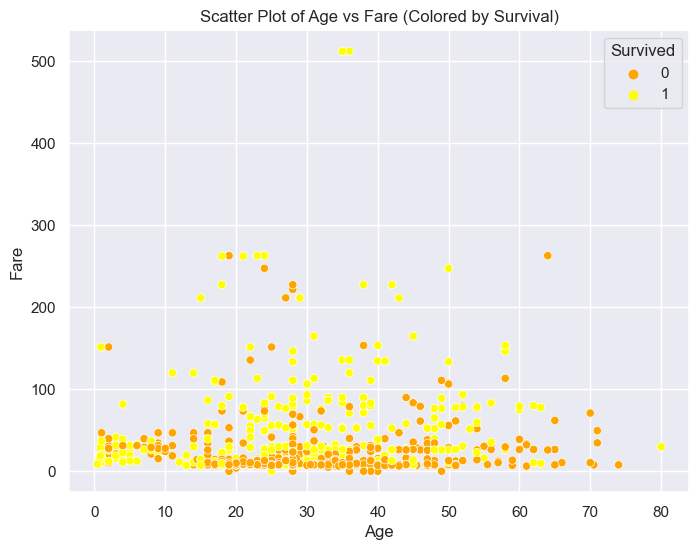

In [28]:
# Scatter Plot - Age vs Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette=custom_palette[:2])
plt.title('Scatter Plot of Age vs Fare (Colored by Survival)')
plt.show()

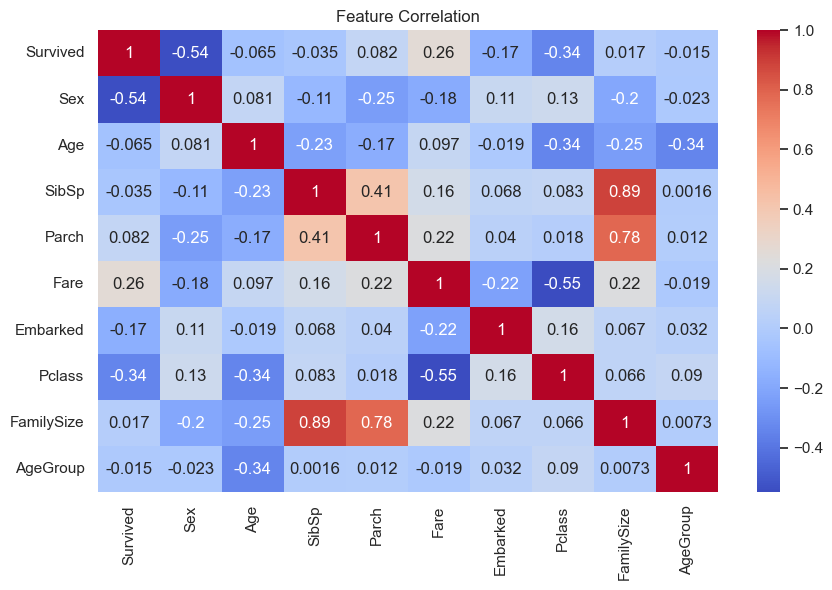

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## Preparing data for modeling

In [32]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,FamilySize,AgeGroup
0,0,1,22.0,1,0,7.2500,2,3,2,4
1,1,0,38.0,1,0,71.2833,0,1,2,0
2,1,0,26.0,0,0,7.9250,2,3,1,0
3,1,0,35.0,1,0,53.1000,2,1,2,0
4,0,1,35.0,0,0,8.0500,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,2,2,1,0
887,1,0,19.0,0,0,30.0000,2,1,1,4
888,0,0,28.0,1,2,23.4500,2,3,4,0
889,1,1,26.0,0,0,30.0000,0,1,1,0


In [ ]:
# 4. Drop unnecessary columns
df.drop([ 'SibSp','Parch'], axis=1, inplace=True)

In [35]:
df

,Survived,Sex,Age,Fare,Embarked,Pclass,FamilySize,AgeGroup
0,0,1,22.0,7.2500,2,3,2,4
1,1,0,38.0,71.2833,0,1,2,0
2,1,0,26.0,7.9250,2,3,1,0
3,1,0,35.0,53.1000,2,1,2,0
4,0,1,35.0,8.0500,2,3,1,0
...,...,...,...,...,...,...,...,...
886,0,1,27.0,13.0000,2,2,1,0
887,1,0,19.0,30.0000,2,1,1,4
888,0,0,28.0,23.4500,2,3,4,0
889,1,1,26.0,30.0000,0,1,1,0


In [36]:
X = df.drop('Survived', axis=1) #input 
y = df['Survived'] # outcome

In [37]:
X

,Sex,Age,Fare,Embarked,Pclass,FamilySize,AgeGroup
0,1,22.0,7.2500,2,3,2,4
1,0,38.0,71.2833,0,1,2,0
2,0,26.0,7.9250,2,3,1,0
3,0,35.0,53.1000,2,1,2,0
4,1,35.0,8.0500,2,3,1,0
...,...,...,...,...,...,...,...
886,1,27.0,13.0000,2,2,1,0
887,0,19.0,30.0000,2,1,1,4
888,0,28.0,23.4500,2,3,4,0
889,1,26.0,30.0000,0,1,1,0


In [39]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Data Modelling: 

- X_train ,y_train (Moldel training) 

- x_test ( Test on trained model to get y_pred) 

- y_test (y_test is for evaluation) , y_test - y_pred (accurate) 

In [41]:
# 9. Modeling - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

- Accuracy : Total correctly classified / Total instances

- Confusion Matrix : TP    TN    FP  FN 

- Accurcay = TP+TN/ TP+TN+FP+FN 
- Precison = TP/(TP+FP) 
- Recall   = TP/ (TP+FN)
       

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


#### 80 Percent of the total data inputs we will be able to predict current survival chances (1,0)

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[90 15]
 [21 53]]


In [44]:

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 
A precision of 0.81 suggets that the model would precict 81% for survived(not-died) rate and 19% of the people it precicted would have not survied. 